In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.interpolate import RectBivariateSpline, griddata

## Accessing data
1. Open dataset with xarray
1. View metadata, use it to extract variables

In [2]:
#Set target file
## CHANGE FILE_DIR TO YOUR PATH
file_dir = 'data/' 
file_name = file_dir + 'air.mon.mean.nc'
#Open data with xarray
ds = xr.open_dataset(file_name)
ds

<xarray.Dataset> Size: 662MB
Dimensions:  (level: 17, lat: 73, lon: 144, time: 926)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Data variables:
    air      (time, level, lat, lon) float32 662MB ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Dataset...
    title:          monthly mean air from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [3]:
ds.values

<bound method Mapping.values of <xarray.Dataset> Size: 662MB
Dimensions:  (level: 17, lat: 73, lon: 144, time: 926)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Data variables:
    air      (time, level, lat, lon) float32 662MB ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Dataset...
    title:          monthly mean air from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...>

In [4]:
#Extract coordinate data corresponding to dimensions
lon = ds.lon #or ds['lon']
lat = ds.lat
lvl = ds.level
time = ds.time
lon

<xarray.DataArray 'lon' (lon: 144)> Size: 576B
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  0.  357.5]
    standard_name:  longitude
    axis:           X

**Note**: Netcdf files have global metadata which is contained in the "attrs" (attributes) property of an xarray dataset object. These typically give general information about the dataset itself such as the source/provider, data type, name of the dataset, references, etc.

Each coordinate and variable also contain their own set of "attrs" which provide specific information about that individual variable such as variable name, units, etc. Typically, units, name, and fillValue/missing_value are the ones which are most relevant to know. Occasionally attributes such as offset and scale_factor will be present, and these are important to know because some variables are transformed using the formula scaled_variable = scale_factor*original_variable + offset to improve file storage. Use the above cell to look at the coordinate information of the dataset

In [5]:
#View variable
air = ds['air']
air

<xarray.DataArray 'air' (time: 926, level: 17, lat: 73, lon: 144)> Size: 662MB
[165479904 values with dtype=float32]
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Attributes:
    long_name:     Monthly Mean of Air temperature
    units:         degC
    precision:     2
    var_desc:      Air Temperature
    level_desc:    Pressure Levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-200.  300.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-108.64999    43.959667]

In [6]:
#Air (and the coordinate variables) are DataArray objects.
#The actual data can be accessed like so:
air_vals = air.values
air_vals

array([[[[-33.909996 , -33.909996 , -33.909996 , ..., -33.909996 ,
          -33.909996 , -33.909996 ],
         [-34.159996 , -34.1      , -34.04     , ..., -34.35     ,
          -34.29     , -34.219994 ],
         [-31.719994 , -31.529991 , -31.359993 , ..., -32.4      ,
          -32.159996 , -31.93     ],
         ...,
         [  1.8600006,   1.8800049,   1.890007 , ...,   1.800003 ,
            1.8200073,   1.840004 ],
         [  1.5600052,   1.5600052,   1.5600052, ...,   1.5400009,
            1.550003 ,   1.550003 ],
         [  0.8800049,   0.8800049,   0.8800049, ...,   0.8800049,
            0.8800049,   0.8800049]],

        [[-26.57     , -26.57     , -26.57     , ..., -26.57     ,
          -26.57     , -26.57     ],
         [-25.46     , -25.379997 , -25.30999  , ..., -25.69999  ,
          -25.619987 , -25.529991 ],
         [-23.729988 , -23.489998 , -23.29     , ..., -24.54     ,
          -24.249992 , -23.979988 ],
         ...,
         [ -2.1899948,  -2.1699905

In [7]:
#DataArrays and datasets are powerful objects which make subsetting climate variables in space and time very easy
#I'm going to extract the Hawaiian Islands region data from Jan. 2024 - Jun. 2024 at near-surface
subset_dataarray = air.sel(lon=slice(197.5,207.5),lat=slice(25,15),level=slice(1000,1000),time=slice(np.datetime64('2024-01-01'),np.datetime64('2024-06-30')))
subset_dataarray

<xarray.DataArray 'air' (time: 6, level: 1, lat: 5, lon: 5)> Size: 600B
array([[[[21.866114, 21.855627, 21.853212, 21.891111, 21.891111],
         [22.643538, 22.760471, 22.891916, 22.910465, 22.743536],
         [23.362082, 23.504824, 23.566109, 23.419338, 23.10563 ],
         [24.127398, 24.160463, 23.989502, 23.601595, 23.241114],
         [24.817724, 24.796759, 24.536272, 24.111275, 23.827404]]],


       [[[20.121538, 20.006878, 19.72326 , 19.345676, 18.974125],
         [21.188776, 21.234468, 21.11119 , 20.818089, 20.482746],
         [22.078434, 22.10688 , 21.995672, 21.694817, 21.336187],
         [22.989637, 22.970675, 22.79395 , 22.41205 , 22.01033 ],
         [23.765501, 23.787916, 23.70343 , 23.430157, 23.093954]]],


       [[[20.000793, 19.848372, 19.575796, 19.237888, 18.894344],
         [21.211277, 21.340315, 21.270147, 21.018536, 20.738693],
         [22.048376, 22.258053, 22.23305 , 21.949976, 21.658052],
         [22.920149, 23.067726, 22.943535, 22.529825, 22.12337 ],
         [23.895147, 24.046753, 23.96934 , 23.637888, 23.252403]]],


       [[[21.23665 , 21.090824, 20.731655, 20.24249 , 19.733328],
         [22.148327, 22.175829, 22.006657, 21.686655, 21.344984],
         [22.888323, 22.913322, 22.71999 , 22.358326, 22.055817],
         [23.837488, 23.766653, 23.404154, 22.84749 , 22.403324],
         [24.836653, 24.75249 , 24.430824, 23.912485, 23.406658]]],


       [[[22.2766  , 22.025795, 21.64999 , 21.262087, 20.827404],
         [23.284668, 23.02338 , 22.685476, 22.399181, 22.16128 ],
         [24.233046, 24.024185, 23.658863, 23.291925, 23.047571],
         [25.054825, 24.87902 , 24.416924, 23.827406, 23.379822],
         [25.787083, 25.618532, 25.14434 , 24.487083, 23.920149]]],


       [[[23.093323, 22.794987, 22.622488, 22.416655, 21.96499 ],
         [23.824152, 23.474154, 23.211657, 23.019157, 22.733326],
         [24.866655, 24.49832 , 24.02499 , 23.60165 , 23.25582 ],
         [25.739988, 25.368322, 24.73499 , 24.024153, 23.476654],
         [26.030825, 25.772486, 25.22332 , 24.514986, 23.952488]]]],
      dtype=float32)
Coordinates:
  * level    (level) float32 4B 1e+03
  * lat      (lat) float32 20B 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 20B 197.5 200.0 202.5 205.0 207.5
  * time     (time) datetime64[ns] 48B 2024-01-01 2024-02-01 ... 2024-06-01
Attributes:
    long_name:     Monthly Mean of Air temperature
    units:         degC
    precision:     2
    var_desc:      Air Temperature
    level_desc:    Pressure Levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-200.  300.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-108.64999    43.959667]

**Note:** The data is structured as a set of stacked arrays. Each 5x5 slice represents the spatial field at the 1st-6th time indices.

## Visualizing data

Text(0.5, 1.0, 'Air temperature at 1000hpa pressure level at lon=205,lat=20')

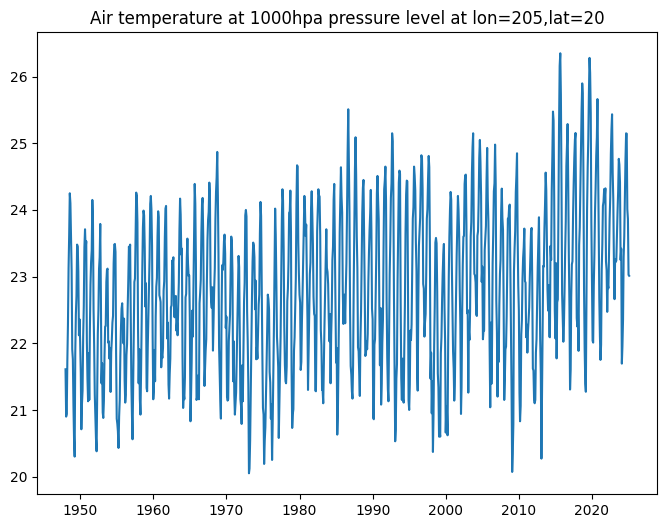

In [8]:
#Plotting time series data
x_index = 205
y_index = 20
data1d = air.sel(lon=x_index,lat=y_index,level=1000)
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(data1d.time,data1d)
ax.set_title('Air temperature at 1000hpa pressure level at lon=205,lat=20')

#notice the trend!

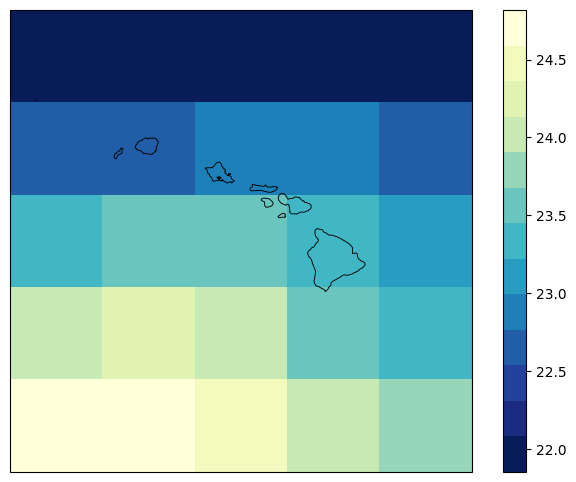

In [9]:
#Plotting spatial data using cartopy and imshow
data_2d = np.squeeze(subset_dataarray[0,0,:,:].values)
fig,ax = plt.subplots(figsize=(8,6),subplot_kw={'projection':ccrs.PlateCarree()})
cmap = plt.get_cmap('YlGnBu_r',13)
plt.imshow(data_2d,cmap=cmap,transform=ccrs.PlateCarree(),extent=[-162.5,-152.5,15,25]) #imshow seems to index with -180:180 longitudes
ax.coastlines(resolution='10m',linewidth=0.65)
plt.colorbar()

In [15]:
data_2d

array([[21.866114, 21.855627, 21.853212, 21.891111, 21.891111],
       [22.643538, 22.760471, 22.891916, 22.910465, 22.743536],
       [23.362082, 23.504824, 23.566109, 23.419338, 23.10563 ],
       [24.127398, 24.160463, 23.989502, 23.601595, 23.241114],
       [24.817724, 24.796759, 24.536272, 24.111275, 23.827404]],
      dtype=float32)

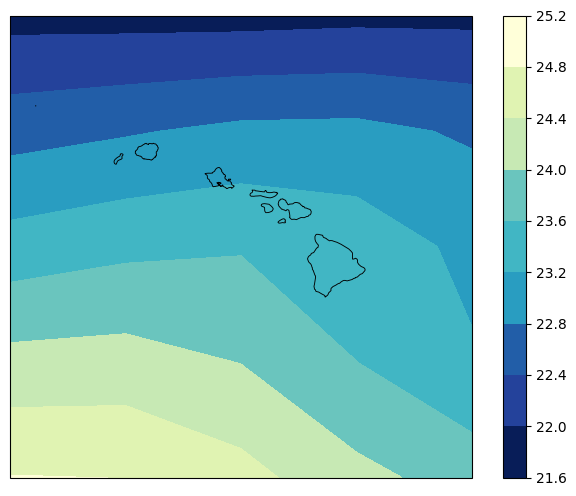

In [10]:
#Plotting data using contourf for smoothly interpolated levels
fig,ax = plt.subplots(figsize=(8,6),subplot_kw={'projection':ccrs.PlateCarree()})
con = plt.contourf(subset_dataarray.lon.values,subset_dataarray.lat.values,data_2d,cmap=cmap,transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=0.65)
fig.colorbar(con)

## Basic computations
### Climatology and Anomalies

In [11]:
#The xarray groupby command is very useful for getting climatologies
#First let's reduce the full air temperature dataset to the Hawaii region
hi_air = air.sel(lon=slice(197.5,207.5),lat=slice(25,15))
#Now use groupby to group the dataset by month
mon_group = hi_air.groupby("time.month")
#The mean command will take the mean of each group separately, to create an average of each month for all times in the record
clim = mon_group.mean()
#We can subtract the mean from the grouped dataset to get the anomalies
#Anomalies typically refers to the variation of the data at a particular time from the mean
anom = mon_group - clim

In [12]:
#Now we have anomalies and climatology, so now we can do some analysis.
#I'm going to plot July 2023 anomalies at 1000hpa
jul23 = anom.sel(time=np.datetime64('2023-07-01'),level=1000)

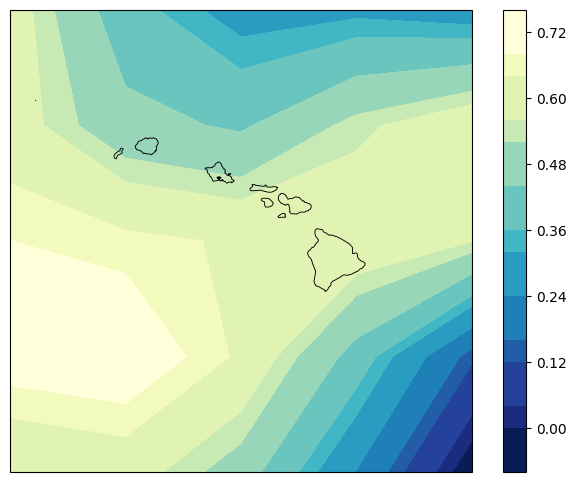

In [13]:
fig,ax = plt.subplots(figsize=(8,6),subplot_kw={'projection':ccrs.PlateCarree()})
nlev = 20 #changing the number of contour levels. This just increases the amount of interpolation
con = plt.contourf(anom.lon.values,anom.lat.values,jul23,nlev,cmap=cmap,transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=0.65)
fig.colorbar(con)

## Since the anomalies are positive, that means that this month's temperatures were higher than the average July 
### compared to the rest of the time series.

ValueError: x and y must have same first dimension, but have shapes (926,) and (924,)

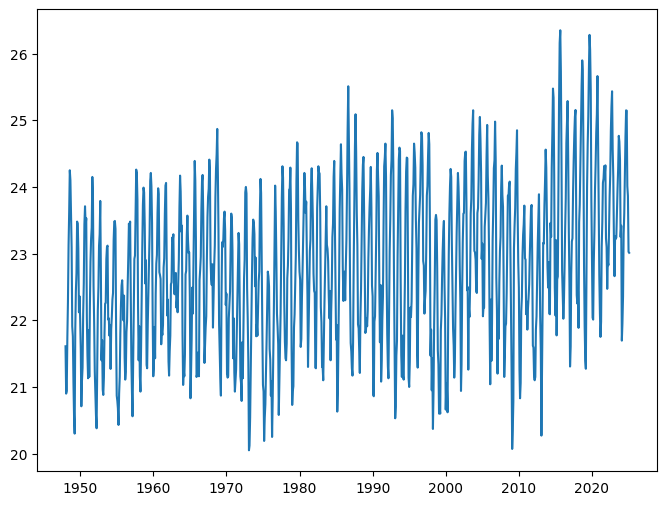

In [14]:
#Plot the full time series vs the climatology
hi1d = hi_air.sel(lon=205,lat=20,level=1000)
clim1d = clim.sel(lon=205,lat=20,level=1000)
#need to make the climatology cyclical
nyears = int(len(hi1d.time)/12)
climrep = np.squeeze(np.matlib.repmat(clim1d,1,nyears))
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(hi1d.time,hi1d)
ax.plot(hi1d.time,climrep)

In [ ]:
nyears

77

In [ ]:
air_temp_1000 = air.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=1000)
air_temp_500 = air.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=500)
air_temp_diff = air_temp_1000 -air_temp_500
air_temp_diff.values
air_temp_diff.to_netcdf("answers/air_temp_diff.nc")

In [ ]:
pottempds = xr.open_dataset("data/pottmp.mon.mean.nc")
pottmp = pottempds['pottmp']
pottmp_1000 = pottmp.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=1000)
pottemp_500 = pottmp.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=500)
pottmp_850 = pottmp.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=850)

pottmp1000_500_diff = pottmp_1000 - pottemp_500
pottmp1000_500_diff.to_netcdf("answers/pottmp1000_500_diff.nc")
pottmp1000_850_diff = pottmp_1000 - pottmp_850
pottmp1000_850_diff.to_netcdf("answers/pottmp1000_850_diff.nc")

In [ ]:
pottmp1000_850_diff

<xarray.DataArray 'pottmp' (time: 926, lat: 5, lon: 5)> Size: 93kB
array([[[-5.7487183, -5.4515686, -5.0631714, -4.6443787, -4.2802734],
        [-5.0996704, -4.674774 , -4.3167114, -4.049286 , -3.8096313],
        [-4.2506104, -4.002899 , -3.9216309, -3.9265137, -3.9042053],
        [-3.60495  , -3.6357117, -3.807434 , -4.0734863, -4.277008 ],
        [-3.4075623, -3.512146 , -3.7157593, -4.023651 , -4.3733215]],

       [[-5.165619 , -4.8647766, -4.684204 , -4.570709 , -4.3846436],
        [-5.1433105, -4.57959  , -4.2641296, -4.2252197, -4.2180786],
        [-4.7767334, -4.346283 , -4.2803345, -4.4982605, -4.677307 ],
        [-4.286499 , -4.2915344, -4.6127014, -5.0949707, -5.359375 ],
        [-4.2215576, -4.5125732, -4.967682 , -5.4069214, -5.6202087]],

       [[-4.6007996, -4.6307373, -4.558777 , -4.2461853, -3.7382812],
        [-4.428528 , -4.3527527, -4.287201 , -4.085327 , -3.730072 ],
        [-4.4106445, -4.3277283, -4.318268 , -4.2774353, -4.1072083],
        [-4.390747 , -4.3797913, -4.4724426, -4.578827 , -4.5966187],
        [-4.3960266, -4.45578  , -4.564148 , -4.693329 , -4.7992554]],

       ...,

       [[-4.295349 , -4.601074 , -4.7937927, -4.8790283, -4.914612 ],
        [-3.5342712, -3.692871 , -3.8525085, -4.105652 , -4.4622498],
        [-2.9148254, -3.1044312, -3.3878784, -3.8300476, -4.3155212],
        [-2.5756226, -2.8494568, -3.3804321, -4.0190125, -4.490967 ],
        [-2.5090027, -2.7027283, -3.3031006, -4.043091 , -4.4905396]],

       [[-3.134735 , -3.4065857, -3.7216187, -3.966278 , -4.2154236],
        [-3.4141846, -3.586792 , -3.770874 , -4.0791626, -4.51416  ],
        [-3.1193848, -3.3268127, -3.6478577, -4.215088 , -4.878418 ],
        [-2.4733276, -2.7624207, -3.3320923, -4.1903687, -5.003784 ],
        [-2.2626038, -2.494751 , -3.0881042, -3.9728699, -4.7532043]],

       [[-4.1972046, -4.4509583, -4.694641 , -4.889221 , -4.976654 ],
        [-4.098938 , -4.15625  , -4.249237 , -4.4533997, -4.700531 ],
        [-3.5908508, -3.6268616, -3.7599182, -4.121399 , -4.5681458],
        [-2.8947449, -3.0336304, -3.3579712, -3.9307556, -4.5147095],
        [-2.626709 , -2.7857666, -3.163269 , -3.7638245, -4.361908 ]]],
      shape=(926, 5, 5), dtype=float32)
Coordinates:
  * lat      (lat) float32 20B 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 20B 197.5 200.0 202.5 205.0 207.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01

In [ ]:
pottmp1000_500_diff

<xarray.DataArray 'pottmp' (time: 926, lat: 5, lon: 5)> Size: 93kB
array([[[-26.261688, -25.711487, -25.320282, -25.139801, -25.100403],
        [-26.78717 , -25.983337, -25.513794, -25.42392 , -25.499908],
        [-27.187897, -26.584778, -26.341736, -26.433594, -26.525726],
        [-27.5242  , -27.236328, -27.21939 , -27.385986, -27.416016],
        [-27.681976, -27.48175 , -27.42749 , -27.504242, -27.482758]],

       [[-24.629059, -24.193817, -23.797668, -23.335876, -22.923492],
        [-25.734314, -25.068878, -24.458832, -23.91864 , -23.46341 ],
        [-26.763885, -26.071747, -25.486969, -25.018555, -24.570251],
        [-27.507385, -26.919403, -26.417664, -26.032715, -25.650177],
        [-28.01056 , -27.46405 , -26.918396, -26.512665, -26.196411]],

       [[-24.866913, -24.67276 , -24.71408 , -24.8555  , -25.01181 ],
        [-24.767914, -24.332642, -24.368378, -24.651764, -24.937683],
        [-25.008575, -24.555817, -24.70462 , -25.199036, -25.651215],
        [-25.55194 , -25.216217, -25.464722, -26.050995, -26.620636],
        [-26.31778 , -26.115753, -26.24585 , -26.625702, -27.116333]],

       ...,

       [[-28.73056 , -28.527771, -28.332031, -28.085602, -27.851257],
        [-29.43277 , -29.007812, -28.520782, -28.083344, -27.832214],
        [-29.793243, -29.398895, -28.80954 , -28.22171 , -27.750366],
        [-29.586548, -29.241943, -28.777802, -28.217743, -27.594788],
        [-29.000916, -28.474854, -28.020142, -27.597168, -27.087921]],

       [[-25.538086, -24.808655, -24.211426, -23.726349, -23.465393],
        [-26.419647, -25.543335, -24.742523, -24.232574, -24.009857],
        [-27.082855, -26.370087, -25.770142, -25.429718, -25.163666],
        [-27.405243, -26.886292, -26.581543, -26.44986 , -26.093292],
        [-27.80246 , -27.241913, -26.957733, -26.80371 , -26.334808]],

       [[-27.166138, -26.94867 , -26.689117, -26.38794 , -26.105072],
        [-28.199982, -27.621643, -27.039917, -26.629791, -26.416534],
        [-28.73526 , -28.17566 , -27.677856, -27.428253, -27.292694],
        [-28.807617, -28.481354, -28.296844, -28.23993 , -28.112762],
        [-28.999939, -28.730469, -28.520386, -28.352905, -28.078491]]],
      shape=(926, 5, 5), dtype=float32)
Coordinates:
  * lat      (lat) float32 20B 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 20B 197.5 200.0 202.5 205.0 207.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01

In [ ]:
shumds = xr.open_dataset("data/shum.mon.mean.nc")
uwindds = xr.open_dataset("data/uwnd.mon.mean.nc")
shum = shumds['shum']
uwnd = uwindds['uwnd']
shum_925 = shum.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=925)
uwnd_925 = uwnd.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=925)
shum_700 = shum.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=700)
uwnd_700 = uwnd.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=700)
zon_mos_trans_925 = shum_925 * uwnd_925
zon_mos_trans_700 = shum_700 * uwnd_700
zon_mos_trans_925.to_netcdf("answers/zon_mos_trans_925.nc")
zon_mos_trans_700.to_netcdf("answers/zon_mos_trans_700.nc")

In [ ]:
vwindds = xr.open_dataset("data/vwnd.mon.mean.nc")
vwnd = vwindds['vwnd']
vwnd_925 = vwnd.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=925)
vwnd_700 = vwnd.sel(lon=slice(197.5, 207.5), lat=slice(25, 15), level=700)
zon_mos_trans_925 = shum_925 * vwnd_925
zon_mos_trans_700 = shum_700 * vwnd_700
zon_mos_trans_925.to_netcdf("answers/merid_mos_trans_925.nc")
zon_mos_trans_700.to_netcdf("answers/merid_mos_trans_700.nc")